In [1]:
#Importing all the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
## Reading the dataset
data = pd.read_csv('water_potability.csv')

## Exploratory data analysis



In [4]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
## Checking if the data is imbalanced. 
data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [96]:
print(data.info())
print('Shape:{}'.format(data.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None
Shape:(3276, 10)


In [94]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


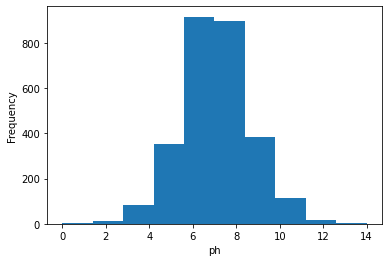

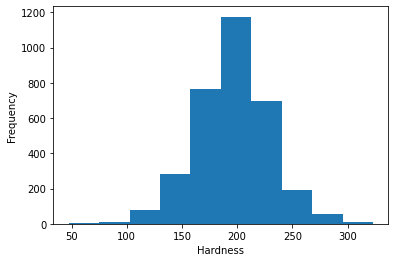

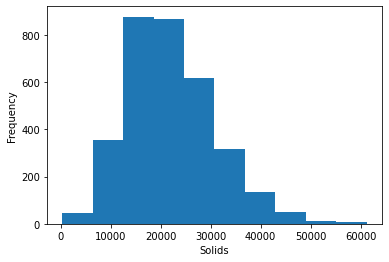

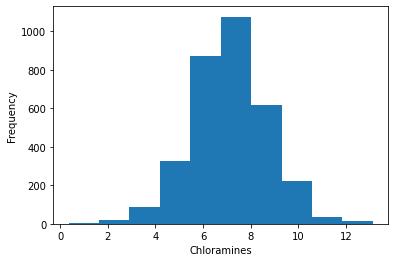

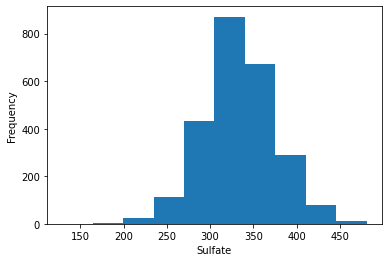

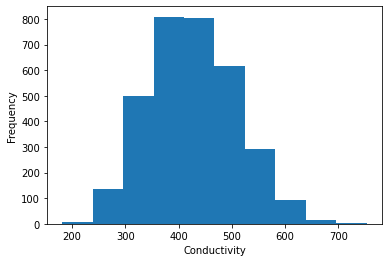

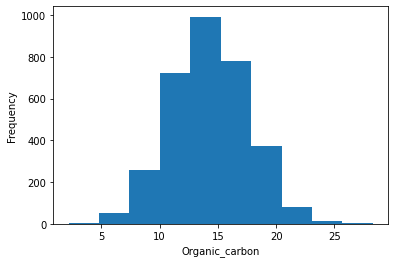

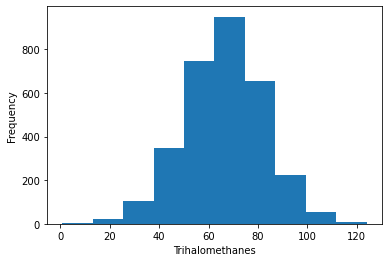

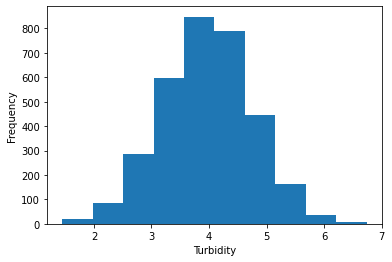

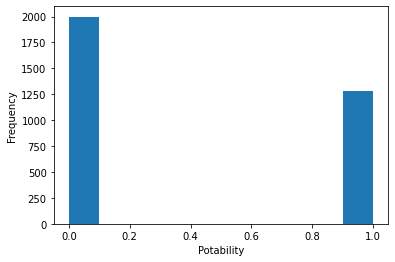

In [8]:
## Checking the distribution of each features. 

for features in data.columns:
    data[features].dropna().plot.hist(bins=10)
    plt.xlabel(features)
    plt.show()

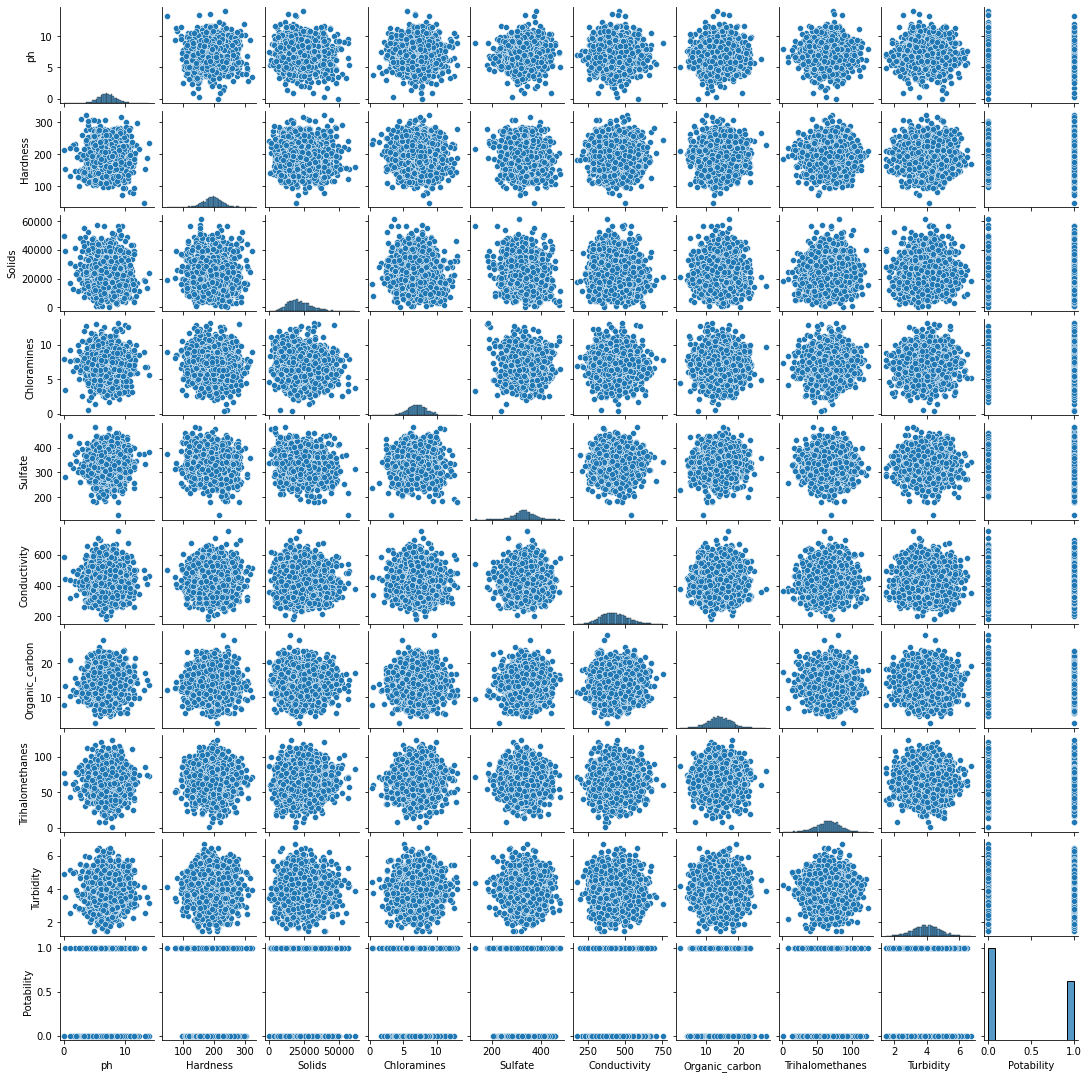

In [13]:
## Pairplot from seaborn. Checking the relationshipt between each feature.

from seaborn import pairplot

g = pairplot(data)
g.fig.set_size_inches(15,15)
plt.show()


In [14]:
## Missing values. 

data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

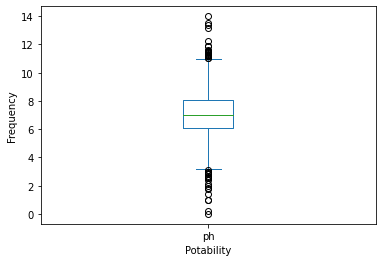

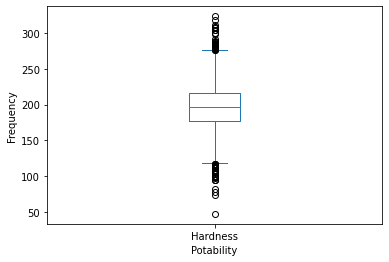

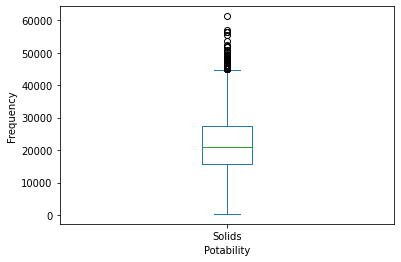

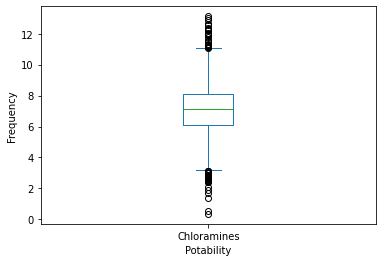

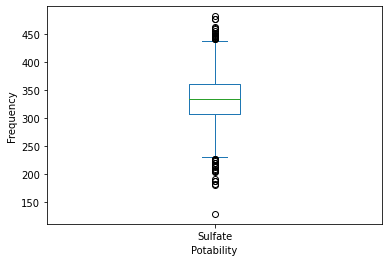

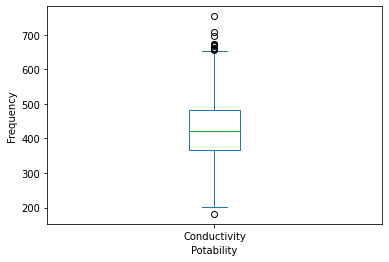

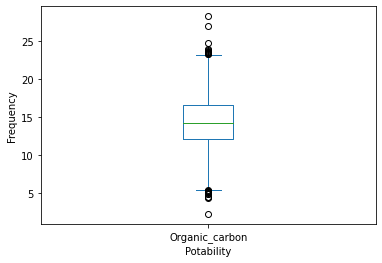

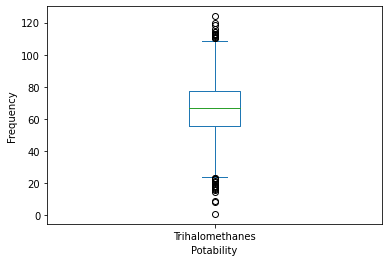

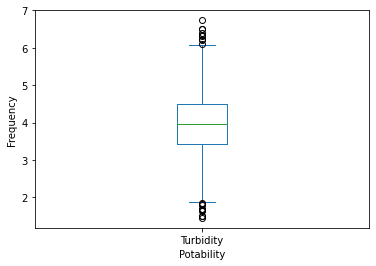

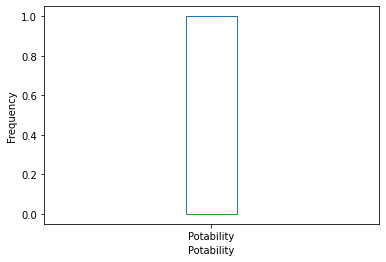

In [15]:
## Outliers

for feature in data.columns:
    data[feature].dropna().plot.box()
    plt.xlabel(features)
    plt.ylabel('Frequency')
    plt.show()

### Feature Engineering 

### 1. Missing value imputation. 

In [16]:
null_values = ['ph','Sulfate','Trihalomethanes']

In [17]:
dataset_1 = data.copy()

In [18]:
## Filling the missing values with median 
for feature in null_values:
    dataset_1[feature] = data[feature].fillna(data[feature].dropna().median())

In [19]:
dataset_1.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [50]:
## Random sample imputation 

def impute_nan(df,variable):
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=2)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable] = random_sample

In [54]:
dataset_2 = data.copy()

In [55]:
impute_nan(dataset_2,'ph')
impute_nan(dataset_2,'Sulfate')
impute_nan(dataset_2,'Trihalomethanes')

In [56]:
dataset_2.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

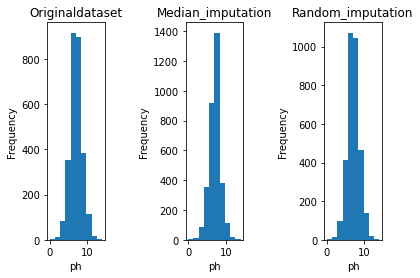

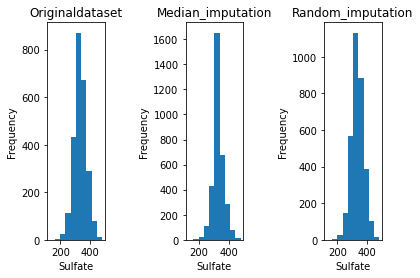

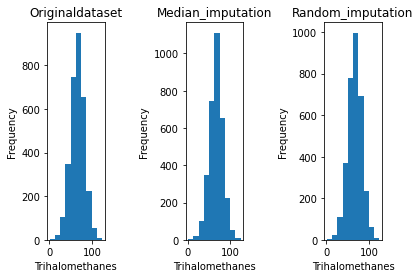

In [67]:
### Comparing the distribution of features in null values with original distribution

for features in null_values:
    plt.subplot(1,5,1)
    data[features].dropna().plot.hist(bins=10)
    plt.xlabel(features)
    plt.title('Originaldataset')
    plt.subplot(1,5,3)
    dataset_1[features].plot.hist(bins=10)
    plt.xlabel(features)
    plt.title('Median_imputation')
    plt.subplot(1,5,5)
    dataset_2[features].plot.hist(bins=10)
    plt.xlabel(features)
    plt.title('Random_imputation')
    plt.show()

In [68]:
## From above observations random sample imputation retained original distribution. We will go \ahead with dataset_2

## Feature selection

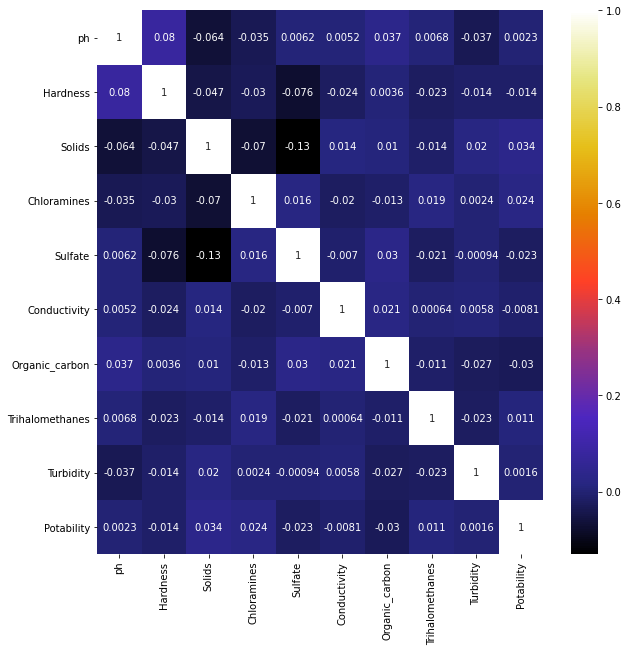

In [91]:
## Feature selection using correlation. 

from seaborn import heatmap
fig, ax = plt.subplots(figsize=(10,10)) 
heatmap(dataset_2.corr(),annot=True,cmap= 'CMRmap',ax=ax)
plt.show()

In [92]:
## There are no features that are highly correlated using correlation 


In [177]:
## Splitting the data
X = dataset_2.drop('Potability',axis=1)
y = dataset_2['Potability']

X.shape

(3276, 9)

In [178]:
## Scaling the features

###Scaling into Min max scaler

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X = sc.fit_transform(X)

In [179]:
## Splitting the data

from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=2)

In [180]:
## Implementing the model using Logistic Regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [181]:
## Evaluation 
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report,accuracy_score
try:
    accuracy_scLR = accuracy_score(y_pred,y_test)
    confusion_matrixLR = confusion_matrix(y_pred,y_test)
    classification_reportLR = classification_report(y_pred,y_test)
    roc_auc_scoreLR = roc_auc_score(y_pred,y_test)
except ValueError:
    pass


C:\Users\kvbha\anaconda3\envs\ANNprojects\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kvbha\anaconda3\envs\ANNprojects\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kvbha\anaconda3\envs\ANNprojects\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [182]:
accuracy_scLR

0.6093591047812817

In [183]:
confusion_matrixLR

array([[599, 384],
       [  0,   0]], dtype=int64)

In [184]:
roc_auc_scoreLR

0.8059244126659857

In [28]:
## Implementing using ANN. 

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch
## Hyperparameter tuning
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=[keras.metrics.BinaryAccuracy()])
    return model
tuner = RandomSearch(build_model, objective='val_binary_accuracy', max_trials=5, executions_per_trial=3,seed=2)
   
tuner.search_space_summary()


tuner.search(X_train, y_train,
             epochs=10,
             validation_data=(X_test, y_test))

tuner.results_summary()

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json
Search space summary
Default search space size: 18
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': No

In [29]:
ANN = tuner.get_best_models(num_models=1)[0]

In [30]:
ANN.fit(X_train,y_train,epochs=100, validation_split=0.3, initial_epoch=3,validation_data=(X_test,y_test))

Epoch 4/100
51/51 [==============================] - 1s 5ms/step - loss: 0.5710 - binary_accuracy: 0.7053 - val_loss: 0.5959 - val_binary_accuracy: 0.6948
Epoch 5/100
51/51 [==============================] - 0s 2ms/step - loss: 0.5726 - binary_accuracy: 0.6984 - val_loss: 0.5983 - val_binary_accuracy: 0.6773
Epoch 6/100
51/51 [==============================] - 0s 2ms/step - loss: 0.5649 - binary_accuracy: 0.7009 - val_loss: 0.6204 - val_binary_accuracy: 0.6991
Epoch 7/100
51/51 [==============================] - 0s 2ms/step - loss: 0.5587 - binary_accuracy: 0.7034 - val_loss: 0.6327 - val_binary_accuracy: 0.6701
Epoch 8/100
51/51 [==============================] - 0s 2ms/step - loss: 0.5609 - binary_accuracy: 0.7097 - val_loss: 0.6078 - val_binary_accuracy: 0.6730
Epoch 9/100
51/51 [==============================] - 0s 2ms/step - loss: 0.5417 - binary_accuracy: 0.7090 - val_loss: 0.6229 - val_binary_accuracy: 0.6831
Epoch 10/100
51/51 [==============================] - 0s 2ms/step - lo

In [22]:
y_pred_ANN = ANN.predict_classes(X_test)

C:\Users\kvbha\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [23]:
accuracy_scANN = accuracy_score(y_pred_ANN,y_test)
confusion_matrixANN= confusion_matrix(y_pred_ANN,y_test)
classification_reportANN = classification_report(y_pred_ANN,y_test)
roc_auc_scoreANN = roc_auc_score(y_pred_ANN,y_test)

In [24]:
accuracy_scANN 

0.6276703967446592

In [25]:
confusion_matrixANN

array([[383, 150],
       [216, 234]], dtype=int64)

In [26]:
classification_reportANN

'              precision    recall  f1-score   support\n\n           0       0.64      0.72      0.68       533\n           1       0.61      0.52      0.56       450\n\n    accuracy                           0.63       983\n   macro avg       0.62      0.62      0.62       983\nweighted avg       0.63      0.63      0.62       983\n'

In [27]:
roc_auc_scoreANN

0.6192870544090057